# <center><font size=10, color="#7B242F"><u> Bootstrap and Aggregation: Bagging</u> </font>

## Introduction 

We have seen in the previous lecture the **ensemble algorithm** which uses different predictors (classifiers or regressors). Another approach is to use the **same training algorithm** for **every predictor** and train them on **different random subsets of the training set**. When sampling is performed with replacement, this method is called **bagging**. When sampling is performed without replacement, it is called **pasting**. In this lecture, our focus is on **Bagging**. 


### Bagging

 - **Bootstrap aggregating or (bagging)**: is a machine learning **ensemble meta-algorithm** designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. 
 
 
 - The concept behind $\textbf{bagging}$ is to combine the predictions of several base learners to create a more accurate output.
 
 
 - In fact, **bagging** stands for **bootstrap aggregation**. Its name refers to the fact that it uses a technique known as the **bootstrap**. Overall, Bagging has the effect of reducing the variance of individual models in the ensemble and helping to **avoid overfitting**..
 
 
 - Although **Bagging** is usually applied to decision tree methods, it can be used with any type of method. 
 
 
 - **Bagging** is a special case of the model averaging approach.
 
 
 - In bagging the **base estimator** could be any model including a decision tree, logistic regression or even a neural network. Each estimator is trained on a distinct bootstrap sample drawn from the training set using all available features.

### Bootstrap Concept

   - It is necessary to try to understand what the **bootstrap** method is. The concept is clear. **Bootstrap** simply means sample with **replacement**. 
   
   - **By replacement**, we mean that bagging allows training instances to be sampled several times for the same predictor (classifier or regressor). 
 
#### Bootstrap Example

- Soppose you have 3 balls labeled A, B, and C. A bootstrap sample is a sample drawn from this with replacement. In other words, each ball can be drwan many times. For example, in the first bootstrap sample shown in the diagram bellow, B was drawn 3 times in a raw. In the second bootstrap sample, A was drawn two times while B was drawn once, and so on. 

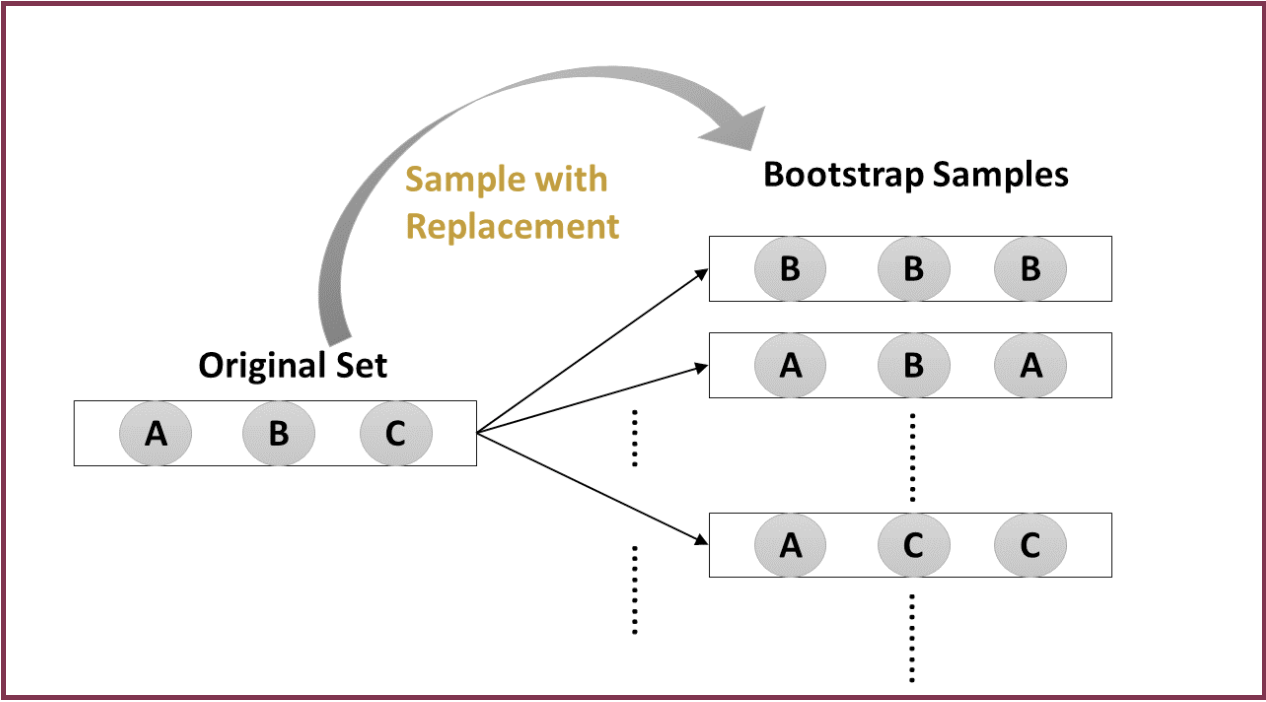

### Bagging Workflow

 1. **Subsetting the data**: In Bagging, the ensemble learning algorithm is formed by models that use the $\color{darkred}{\textbf{same training algorithm}}$. However, these models are not trained on the entire training set. Instead, each model is trained on a different $\color{darkred}{\textbf{subset of the data}}$.

**The following diagram shows how the bootstrap aggregation flow works.**

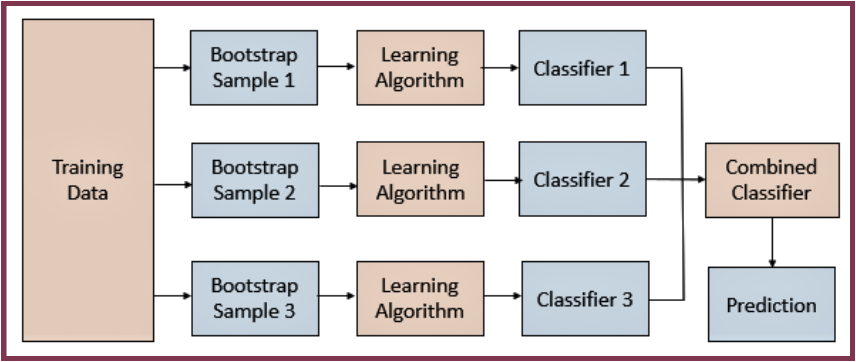

2. **Bagging Training**: In the training phase, bagging consists of drawing **N** different bootstrap samples from the training set. Each of these bootstrap samples are then used to train **N** models that use the same algorithm .

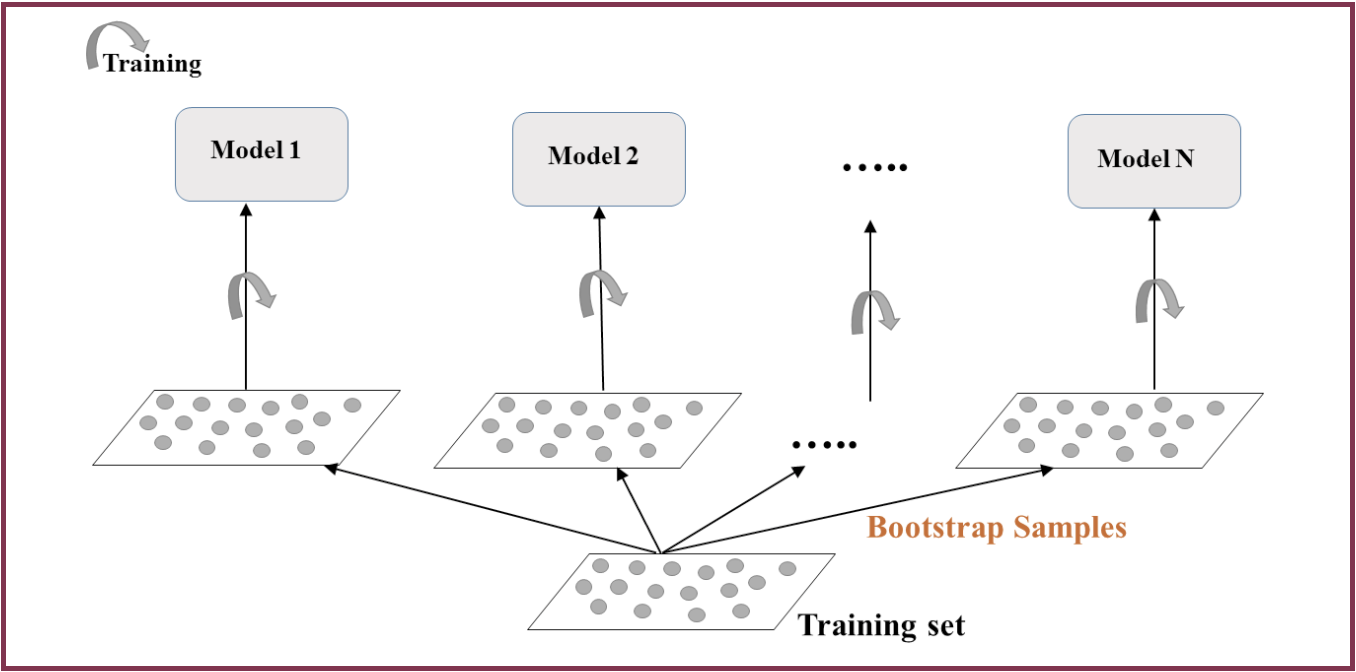

3. ** Bagging Prediction**: When a new instance is fed to the different models forming the bagging ensemble, each model outputs its prediction. The **meta model** collects these predictions and outputs a final prediction depending on the nature of the problem.
    - **In classification**: the final prediction is obtained by majority voting. 
    - **In regression**: the final prediction is the average of the predictions made by the individual models forming the ensemble.

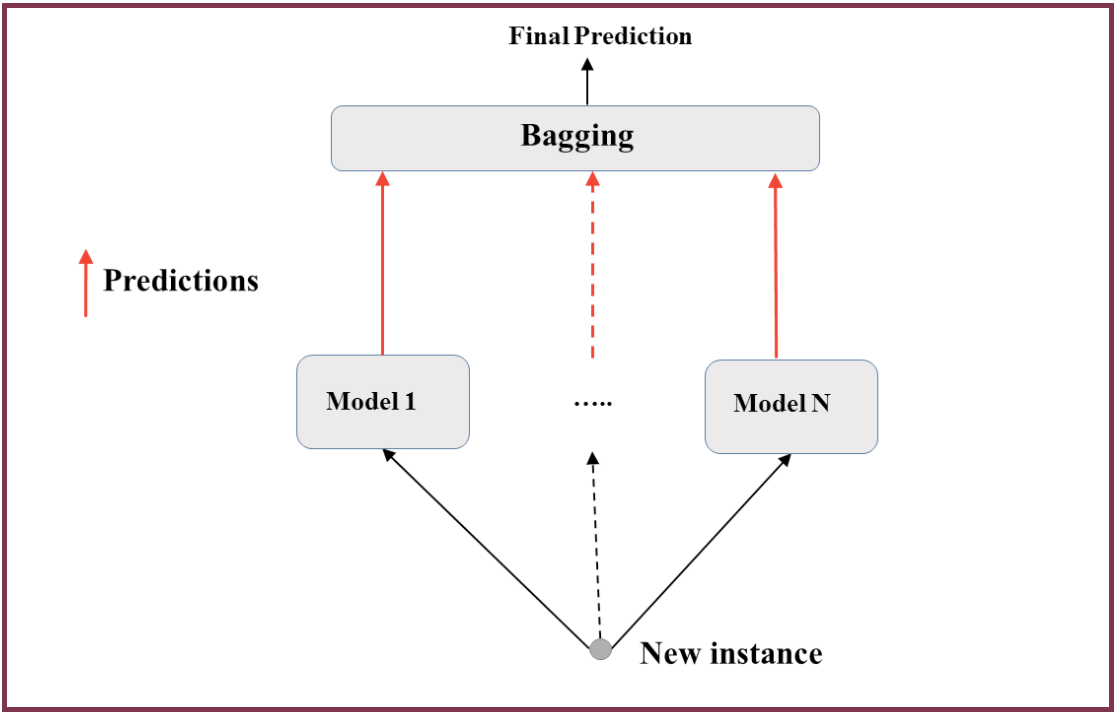

___

# <center><font size=6, color="#7B24FF"><u> Bagging Implementation in SkLearn</u> </font>

The **scikit-learn** library implements **Bagging** by providing two estimators:

   - `BaggingClassifier` for classification problems
   
   - `BaggingRegressor` for regression problems. 

  - Import `BaggingClassifier` from `sklearn.ensemble`, `DecisionTreeClassifier` from `sklearn.tree`, `accuracy_score` from `sklearn.metrics`  and `train_test_split` from `sklearn.model_selection`.
  - Split the data into train and test.
  - Instantiate the classifiers `DecisionTreeClassifier` (and set the parameters) and `BaggingClassifier`.
  
  - Set the **base_estimator** parameter to your estimator; in our example, the base estimator is  `DecisionTreeClassifier`.
  
  - Set the **n_estimators** to a specified number. This number represents the number of base estimators to be trained. 
  
  - Set other parameters based on your needs.
  - Fit the bagging classifier to the training set.
  - Evaluate the model on the test set.

```python
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,                                             
    stratify=y,                    
    random_state=10)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,
                            min_samples_leaf=0.16, 
                            random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=300,
                       n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))
```

# <center><font size=6, color="#7B24FF"><u>  Indian Liver Project Using Bagging </u> </font>

In [1]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# from sklearn.metrics import necessary metrics
from sklearn.metrics import accuracy_score


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline 

In [2]:
liver = pd.read_csv('liver.csv')
print("*" * 50)
liver.info()
print("*" * 50)
liver.head()

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
**************************************************


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.700,0.100,187,16,18,6.800,3.300,0.900,1
1,62,Male,10.900,5.500,699,64,100,7.500,3.200,0.740,1
2,62,Male,7.300,4.100,490,60,68,7.000,3.300,0.890,1
3,58,Male,1.000,0.400,182,14,20,6.800,3.400,1.000,1
4,72,Male,3.900,2.000,195,27,59,7.300,2.400,0.400,1


In [3]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#Imputing values
liver['alkphos']=imp.fit_transform(liver[['alkphos']])

In [4]:
#Replacing Male and Female with 1 and 0
liver['gender'] = liver['gender'].apply(lambda x:1 if x == 'Male' else 0)

In [5]:
# Splitting the data
# ==================
X = liver.drop(['is_patient'], axis=1)
y = liver['is_patient']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=3)

In [6]:
# Instantiate dt
# ==============
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
# ==============
bc = BaggingClassifier(base_estimator=dt,
                       n_estimators= 300,
                       random_state=1)


# Fit bc to the training set
# =========================
bc.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = bc.predict(X_test)

# Evaluate acc_test
# -----------------
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.67


# <center><font size=7, color="#9B11FF"><u>  Out Of Bag Evaluation </u> </font>

 - In $\textbf{bagging}$, some instances may be sampled several times for one model. On the other hand, other instance may not be sampled at all.
 
 - For example, if you are bagging decision trees, each decision tree is trained using a bootstrapped subset of observations. This means that for every tree there is a separate subset of observations not being used to train that tree. These are called $\textbf{out-of-bag (OOB)}$ observations. We can use OOB observations as a test set to evaluate the performance of our decision tree or random forest.
 

- On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances.


- Since **OOB** instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as $\textbf{OOB-evaluation}$.


### OOB Evaluation Example

- In the diagram bellow, for each model, the bootstrap instances are shown in blue while the OOB-instances are shown in red.

- Each of the N models constituting the ensemble is then trained on its corresponding bootstrap samples and evaluated on the OOB instances. 

- This leads to the obtainment of **N OOB** scores labeled $OOB_{1}$ to $OOB_{N}$.

- The OOB-score of the bagging ensemble is evaluated as the average of these **N OOB** scores as shown by the formula on top.

## OOB Evaluation Example Diagram

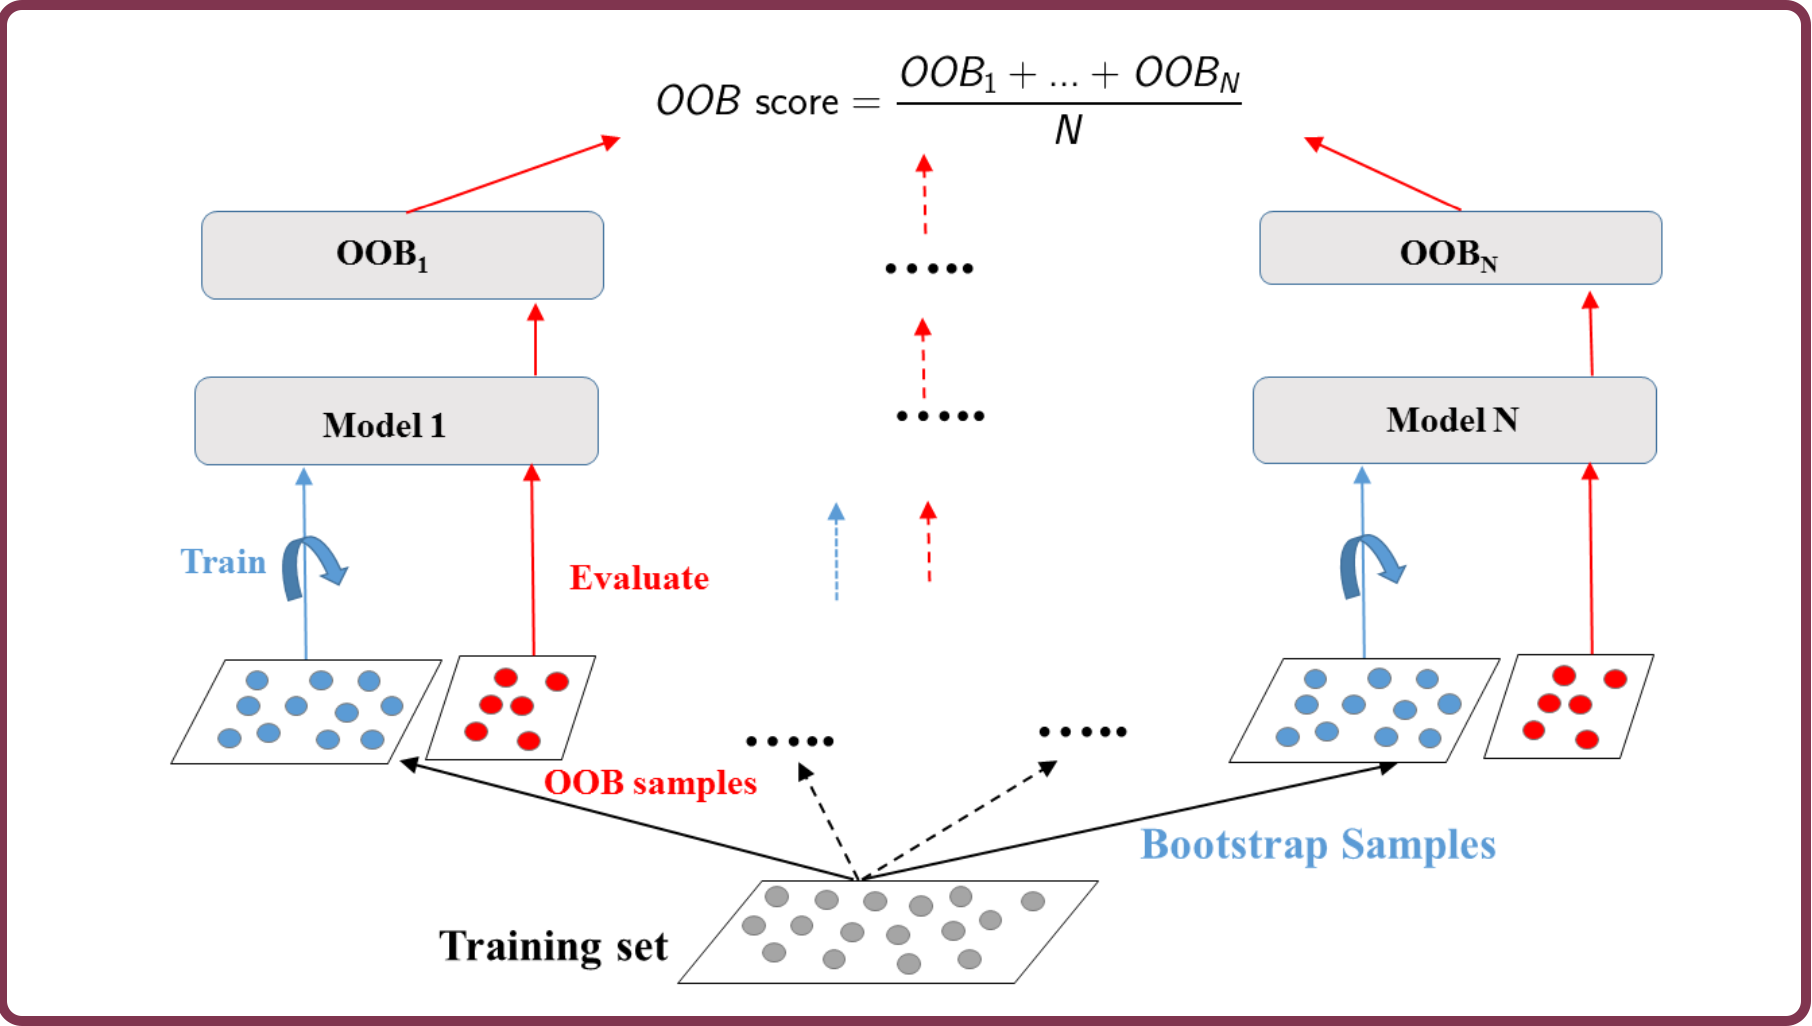

### OOB Evaluation Implementation in SkLearn

- In Scikit-Learn library, you can set `oob_score` to `True` when creating a to request an automatic oob evaluation after training. The next steps are for training a `baggingclassifier` and evaluating it using **OOB**.

- **Step 01**: Import the next necessary tools:
    - `BaggingClassifier` from `sklearn.ensemble`
    - `DecisionTreeClassifier` from `sklearn.tree`
    - `accuracy_score` from `sklearn.metrics`
    - `train_test_split` from `sklearn.model_selection`
    

- **Step 02**: split the dataset in a stratified way into train  and test set (recall: stratification is done by setting the parameter `stratify` to `y`)

- **Step 03**: Instantiate the classifiers:
    - Instantiate `DecisionTreeClassifier` and set the parameters based on your needs.
    - Instantiate `BaggingClassifier` and most importantly, set  `oob_score` to `True` to use out-of-bag evaluation.

- **Step 04**: Fit the `BaggingClassifier` to training set.

- **Step 05**: make predictions on test set.

- **Step 06**: evaluate the model on the test set using accuracy metric.

- **Step 07**: evaluate the **OOB-accuracy** of `BaggingClassifier` by extracting the attribute `oob_score_` from the trained model.

### Note:
 - OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation. 
 
 
**The python syntax for training a bagging classifier**:

```python

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Import splitting function and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator= dt, 
            n_estimators= 50 ,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {test:.3f}, OOB accuracy: {oob:.3f}'.format( test = acc_test, oob = acc_oob))
```

In [7]:
## =============================================================
#         Training Bagging Classifier
## =============================================================

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate dt
# --------------
dt = DecisionTreeClassifier(min_samples_leaf=8,
                            random_state=1)

# Instantiate bagging classifier
# ------------------------------
bc = BaggingClassifier(base_estimator= dt, 
                       n_estimators= 500 ,
                       oob_score=True,
                       random_state=1)

# Fit bc to the training set
# -------------------------
bc.fit(X_train, y_train)

# Predict test set labels
#-------------------------
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = bc.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.709
**************************************************
The OOB accuracy: 0.702


## Tuning Bagging Classifier

 - In this section, we tune few hyperparamters of Bagging Classifier as a bonus section.

In [8]:
# Train the classifier using the best params
# ------------------------------------------

# Instantiate the base estimator with best params
# ------------------------------------------------
best_dt_model = DecisionTreeClassifier(criterion='entropy',
                   max_leaf_nodes=2,
                    max_depth=3)

# Instantiate the bagging classifier
# ---------------------------------
final_bag_dt_model =BaggingClassifier(base_estimator=best_dt_model,
                                      n_estimators=100,
                                      bootstrap=True, 
                                      random_state=1, 
                                      oob_score=True)

# Fit the best model
# ------------------
final_bag_dt_model.fit(X_train, y_train)

# Generate Predictions
# ---------------------
bag_predictedvalues = final_bag_dt_model.predict(X_test)

# See the OOB accuracy
# --------------------
acc_oob = final_bag_dt_model.oob_score_

print("="*40)
print("The Out Of Bag Accuracy is: {:0.3}".format(acc_oob))
print("="*40)

The Out Of Bag Accuracy is: 0.712
